Лабораторная работа № 1 по Нейроинформатике

Персептроны. Процедура обучения Розенбланта

Выполнила: Тимофеева Наталья М8О-408Б-19

Вариант № 16

Часть 1

Бинарная классификация

In [136]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras import activations
from matplotlib import pyplot as plt

Данные для обучения

In [137]:
data_xy = np.array([[-5, 1], [-1.2, 4.1], [-5, -0.4], [-0.8, -0.4], [2.7, -1.8], [2.8, -0.3]])
labels = np.array([0, 0, 0, 1, 1, 1])

In [138]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_dim = 2, activation='sigmoid',
                             kernel_initializer = keras.initializers.RandomNormal(stddev = 0.5, mean = 0.0),
                             bias_initializer = keras.initializers.Zeros()))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

In [139]:
model.fit(data_xy, labels, batch_size = 1, epochs = 500)

Epoch 1/500
6/6 [==============================] - 0s 990us/step - loss: 0.1957 - mae: 0.4164
Epoch 2/500
6/6 [==============================] - 0s 798us/step - loss: 0.1928 - mae: 0.4126
Epoch 3/500
6/6 [==============================] - 0s 796us/step - loss: 0.1898 - mae: 0.4087
Epoch 4/500
6/6 [==============================] - 0s 997us/step - loss: 0.1877 - mae: 0.4058
Epoch 5/500
6/6 [==============================] - 0s 1ms/step - loss: 0.1850 - mae: 0.4017
Epoch 6/500
6/6 [==============================] - 0s 1ms/step - loss: 0.1822 - mae: 0.3983
Epoch 7/500
6/6 [==============================] - 0s 997us/step - loss: 0.1798 - mae: 0.3950
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1772 - mae: 0.3917
Epoch 9/500
6/6 [==============================] - 0s 1ms/step - loss: 0.1752 - mae: 0.3887
Epoch 10/500
6/6 [==============================] - 0s 997us/step - loss: 0.1731 - mae: 0.3856
Epoch 11/500
6/6 [==============================] - 0s 1ms/step - l

In [140]:
weights = model.layers[0].get_weights()
weights

[array([[ 0.6254261 ],
        [-0.62328756]], dtype=float32),
 array([0.77859956], dtype=float32)]

In [141]:
def fun(x, w):
    b = w[1][0]
    return (-x * w[0][0] - b) / w[0][1]

In [142]:
pl_x = np.linspace(-5, 3, 200)
pl_y = [fun(x, weights) for x in pl_x]

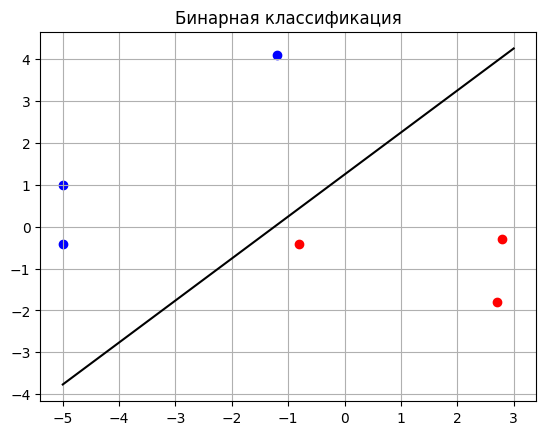

In [143]:
x1 = [i[0] for i in data_xy[:3]]
y1 = [i[1] for i in data_xy[:3]]
x2 = [i[0] for i in data_xy[3:]]
y2 = [i[1] for i in data_xy[3:]]
fig, ax = plt.subplots()
ax.scatter(x1, y1, c = 'blue')
ax.scatter(x2, y2, c = 'red')
ax.plot(pl_x, pl_y, c = 'black')
ax.set_title('Бинарная классификация')
plt.grid()